# Telecom Customer Churn


**Dataset:** https://kaggle.com/datasets/mnassrib/telecom-churn-datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv("datasets/churn-bigml-80.csv")
test = pd.read_csv("datasets/churn-bigml-20.csv")
data = pd.concat([train, test])
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   float6

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [5]:
data.describe(include='object').T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411


In [6]:
data['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

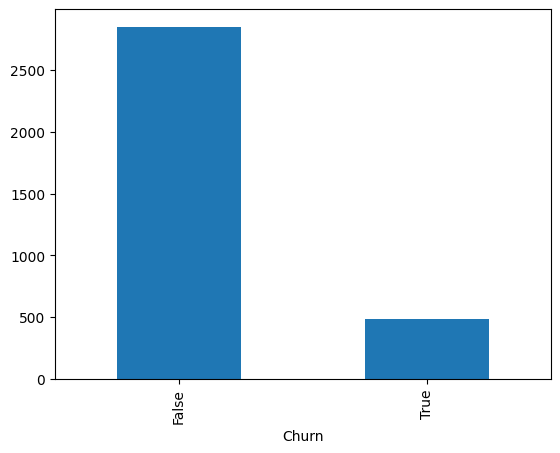

In [7]:
data['Churn'].value_counts().plot(kind='bar');

In [8]:
international_crosstab = pd.crosstab(index=data['Churn'], columns=data['International plan'])
international_crosstab

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [9]:
pd.crosstab(index=data['Churn'], columns=data['International plan'], normalize='columns')

International plan,No,Yes
Churn,,
False,0.88505,0.575851
True,0.11495,0.424149


<Axes: xlabel='Churn'>

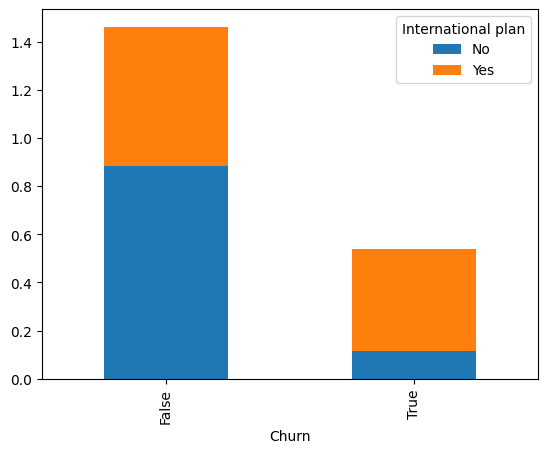

In [10]:
pd.crosstab(index=data['Churn'], columns=data['International plan'], normalize='columns').plot(kind='bar', stacked=True)

In [11]:
pd.crosstab(index=data['Churn'], columns=data['International plan'], normalize='index')

International plan,No,Yes
Churn,,
False,0.934737,0.065263
True,0.716356,0.283644


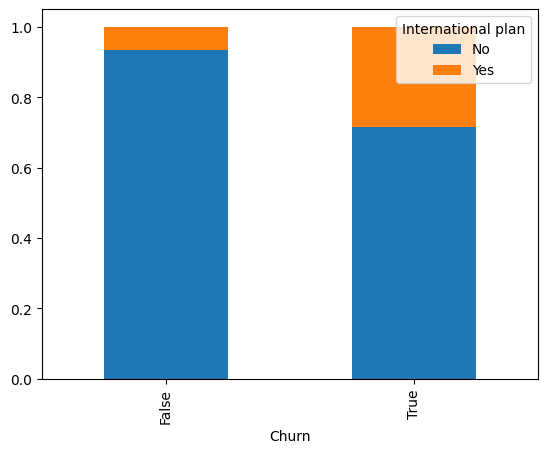

In [12]:
pd.crosstab(index=data['Churn'], columns=data['International plan'], normalize='index').plot(kind='bar', stacked=True);

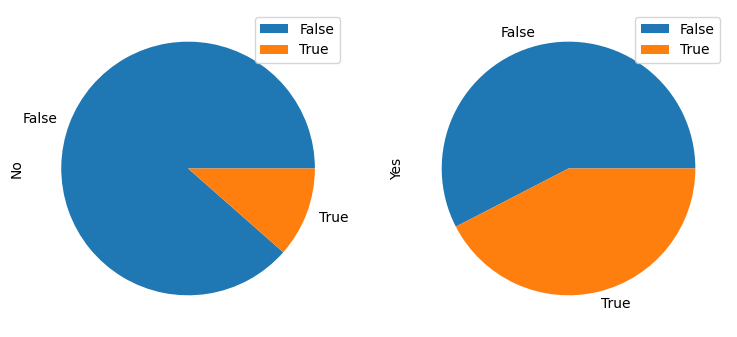

In [13]:
international_crosstab.plot.pie(subplots=True, figsize=(9, 5));

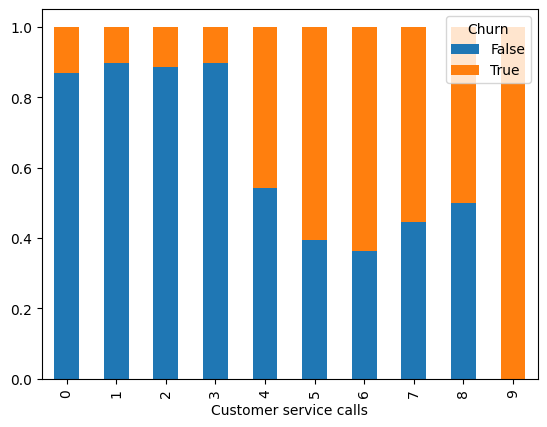

In [14]:
pd.crosstab(index=data['Customer service calls'], columns=data['Churn'], normalize='index').plot(kind='bar', stacked=True);

## Data Preprocessing

In [15]:
train[['International plan', 'Voice mail plan']] = train[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})
test[['International plan', 'Voice mail plan']] = test[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})

train[['International plan']].value_counts()

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_11508\265156805.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[['International plan', 'Voice mail plan']] = train[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})
C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_11508\265156805.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[['International plan', 'Voice mail plan']] = test[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})


International plan
0                     2396
1                      270
Name: count, dtype: int64

In [16]:
train['Total charge amount'] = train['Total day charge'] + train['Total eve charge'] + train['Total night charge'] + train['Total intl charge']
train['Total call minutes'] = train['Total day minutes'] + train['Total eve minutes'] + train['Total night minutes'] + train['Total intl minutes']
train['Total number of calls'] = train['Total day calls'] + train['Total eve calls'] + train['Total night calls'] + train['Total intl calls']

In [17]:
test['Total charge amount'] = test['Total day charge'] + test['Total eve charge'] + test['Total night charge'] + test['Total intl charge']
test['Total call minutes'] = test['Total day minutes'] + test['Total eve minutes'] + test['Total night minutes'] + test['Total intl minutes']
test['Total number of calls'] = test['Total day calls'] + test['Total eve calls'] + test['Total night calls'] + test['Total intl calls']

In [18]:
train.drop(['State', 'Area code'], axis=1, inplace=True)
test.drop(['State', 'Area code'], axis=1, inplace=True)

In [19]:
# train['Churn'] = train['Churn'].astype(int)
# test['Churn'] = test['Churn'].astype(int)

# train['Churn'], test['Churn']

In [20]:
X_train = train.drop('Churn', axis=1)
y_train = train[['Churn']]
X_test = test.drop('Churn', axis=1)
y_test = test[['Churn']]

X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((2666, 20), (667, 20), (2666, 1), (667, 1))

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train, X_test

(array([[ 0.69216332, -0.33569005,  1.62391742, ...,  1.54557066,
          1.39596213, -0.05542219],
        [ 0.16127783, -0.33569005,  1.62391742, ..., -0.01170396,
          0.3760913 ,  0.7872349 ],
        [ 0.91968567, -0.33569005, -0.61579486, ...,  0.27933082,
         -0.57504911,  0.81629204],
        ...,
        [-0.82465237, -0.33569005, -0.61579486, ...,  0.39765316,
         -0.06511369, -1.91507923],
        [-1.83586283, -0.33569005, -0.61579486, ...,  0.79937658,
          0.93480315, -1.1886507 ],
        [-0.6729708 , -0.33569005,  1.62391742, ...,  1.68393146,
          1.81943024, -0.839965  ]]),
 array([[ 0.34712707, -0.29380132, -0.6288064 , ...,  1.27851712,
          1.87299223, -1.01493527],
        [-0.92773053, -0.29380132, -0.6288064 , ..., -0.52928064,
         -0.17029826,  0.89591412],
        [ 1.42585272, -0.29380132, -0.6288064 , ...,  3.07213238,
          2.50455474, -0.14636736],
        ...,
        [-1.05031299, -0.29380132, -0.6288064 , ..., -

## Modeling

In [22]:
# Train the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# Test the model
print("Decision Tree Train Score:", round(tree_model.score(X_train, y_train) * 100, 2))
print("Decision Tree Test Score:", round(tree_model.score(X_test, y_test) * 100, 2))

y_pred = tree_model.predict(X_test)
acc = round(accuracy_score(y_test, y_pred), 3)
print("Accuracy Score:", acc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Train Score: 100.0
Decision Tree Test Score: 94.9
Accuracy Score: 0.949
Confusion Matrix:
 [[551  21]
 [ 13  82]]
